In [1]:
from model import ModelHandler
from DataLoader import DiagnosisEnd2End
import numpy as np
import tqdm
import torch
from Unet2 import UNET
from results_analysis import results
from ImageTransformations import otsu, mnorm


model = UNET(1, 1)
model.load_state_dict(torch.load("unet_segment.pth"))


def otsu_norm_transf(x): return otsu(mnorm(x, -680, 340))


## End2End Data

In [2]:
path_segmentation = "C:/Users/Usuario/Desktop/Uni/DataDaniMAPSIV/PSIV/02-Cancer_diagnosis/data/Diagnosis/"
nodules_path = "../data/Diagnosis/Radiolung_NoduleDiagnosis.csv"

In [3]:
diagonis = DiagnosisEnd2End(path_segmentation, nodules_path)

X_data_curated = np.zeros((49, 14, 64, 64))
y_data_curated = np.zeros(49)
i = 0

for idx in tqdm.tqdm(range(len(diagonis))):
    data = diagonis[idx]
    m = data['ROI'].shape[0]//2   
    X_data_curated[i] = otsu_norm_transf(model(torch.from_numpy(data["ROI"][m-7:m+7, :, :]).reshape((14, 1, 64, 64)).float()).detach().numpy().reshape((14, 64, 64)))
    y_data_curated[i] = data['GT'] if type(data['GT']) != type([]) else data['GT'][0]
    i+=1



  0%|          | 0/49 [00:00<?, ?it/s]

Len Dataloader: 49 // Actual index: 0 // Len diagnosis path 47 // Len anonymous nodules 49


  2%|▏         | 1/49 [00:02<01:36,  2.01s/it]

Len Dataloader: 49 // Actual index: 1 // Len diagnosis path 47 // Len anonymous nodules 49


  4%|▍         | 2/49 [00:05<02:19,  2.98s/it]

Len Dataloader: 49 // Actual index: 2 // Len diagnosis path 47 // Len anonymous nodules 49


  6%|▌         | 3/49 [00:09<02:34,  3.35s/it]

Len Dataloader: 49 // Actual index: 3 // Len diagnosis path 47 // Len anonymous nodules 49


  8%|▊         | 4/49 [00:13<02:34,  3.43s/it]

Len Dataloader: 49 // Actual index: 4 // Len diagnosis path 47 // Len anonymous nodules 49


 10%|█         | 5/49 [00:21<03:56,  5.37s/it]

Len Dataloader: 49 // Actual index: 5 // Len diagnosis path 47 // Len anonymous nodules 49


 12%|█▏        | 6/49 [00:25<03:33,  4.95s/it]

Len Dataloader: 49 // Actual index: 6 // Len diagnosis path 47 // Len anonymous nodules 49


 14%|█▍        | 7/49 [00:30<03:27,  4.94s/it]

Len Dataloader: 49 // Actual index: 7 // Len diagnosis path 47 // Len anonymous nodules 49


 16%|█▋        | 8/49 [00:33<02:53,  4.24s/it]

Len Dataloader: 49 // Actual index: 8 // Len diagnosis path 47 // Len anonymous nodules 49


 18%|█▊        | 9/49 [00:37<02:49,  4.23s/it]

Len Dataloader: 49 // Actual index: 9 // Len diagnosis path 47 // Len anonymous nodules 49


 20%|██        | 10/49 [00:42<02:56,  4.51s/it]

Len Dataloader: 49 // Actual index: 10 // Len diagnosis path 47 // Len anonymous nodules 49


 22%|██▏       | 11/49 [00:48<02:59,  4.71s/it]

Len Dataloader: 49 // Actual index: 11 // Len diagnosis path 47 // Len anonymous nodules 49


 24%|██▍       | 12/49 [00:53<03:00,  4.87s/it]

Len Dataloader: 49 // Actual index: 12 // Len diagnosis path 47 // Len anonymous nodules 49


 27%|██▋       | 13/49 [00:58<02:56,  4.89s/it]

Len Dataloader: 49 // Actual index: 13 // Len diagnosis path 47 // Len anonymous nodules 49


 29%|██▊       | 14/49 [01:03<02:59,  5.12s/it]

Len Dataloader: 49 // Actual index: 14 // Len diagnosis path 47 // Len anonymous nodules 49


 31%|███       | 15/49 [01:09<02:53,  5.11s/it]

Len Dataloader: 49 // Actual index: 15 // Len diagnosis path 47 // Len anonymous nodules 49


 33%|███▎      | 16/49 [01:13<02:45,  5.02s/it]

Len Dataloader: 49 // Actual index: 16 // Len diagnosis path 47 // Len anonymous nodules 49


 35%|███▍      | 17/49 [01:19<02:46,  5.22s/it]

Len Dataloader: 49 // Actual index: 17 // Len diagnosis path 47 // Len anonymous nodules 49


 37%|███▋      | 18/49 [01:24<02:38,  5.13s/it]

Len Dataloader: 49 // Actual index: 18 // Len diagnosis path 47 // Len anonymous nodules 49


 39%|███▉      | 19/49 [01:25<01:54,  3.80s/it]

Len Dataloader: 49 // Actual index: 19 // Len diagnosis path 47 // Len anonymous nodules 49


 41%|████      | 20/49 [01:30<02:05,  4.33s/it]

Len Dataloader: 49 // Actual index: 20 // Len diagnosis path 47 // Len anonymous nodules 49


 43%|████▎     | 21/49 [01:43<03:14,  6.96s/it]

Len Dataloader: 49 // Actual index: 21 // Len diagnosis path 47 // Len anonymous nodules 49


 45%|████▍     | 22/49 [01:49<02:55,  6.48s/it]

Len Dataloader: 49 // Actual index: 22 // Len diagnosis path 47 // Len anonymous nodules 49


 47%|████▋     | 23/49 [01:54<02:38,  6.08s/it]

Len Dataloader: 49 // Actual index: 23 // Len diagnosis path 47 // Len anonymous nodules 49


 49%|████▉     | 24/49 [01:58<02:16,  5.46s/it]

Len Dataloader: 49 // Actual index: 24 // Len diagnosis path 47 // Len anonymous nodules 49


 51%|█████     | 25/49 [02:03<02:05,  5.23s/it]

Len Dataloader: 49 // Actual index: 25 // Len diagnosis path 47 // Len anonymous nodules 49


 53%|█████▎    | 26/49 [02:08<02:03,  5.36s/it]

Len Dataloader: 49 // Actual index: 26 // Len diagnosis path 47 // Len anonymous nodules 49


 55%|█████▌    | 27/49 [02:09<01:27,  3.96s/it]

Len Dataloader: 49 // Actual index: 27 // Len diagnosis path 47 // Len anonymous nodules 49


 57%|█████▋    | 28/49 [02:14<01:30,  4.31s/it]

Len Dataloader: 49 // Actual index: 28 // Len diagnosis path 47 // Len anonymous nodules 49


 59%|█████▉    | 29/49 [02:20<01:34,  4.72s/it]

Len Dataloader: 49 // Actual index: 29 // Len diagnosis path 47 // Len anonymous nodules 49


 61%|██████    | 30/49 [02:25<01:35,  5.02s/it]

Len Dataloader: 49 // Actual index: 30 // Len diagnosis path 47 // Len anonymous nodules 49


 63%|██████▎   | 31/49 [02:34<01:47,  5.97s/it]

Len Dataloader: 49 // Actual index: 31 // Len diagnosis path 47 // Len anonymous nodules 49


 65%|██████▌   | 32/49 [02:39<01:38,  5.81s/it]

Len Dataloader: 49 // Actual index: 32 // Len diagnosis path 47 // Len anonymous nodules 49


 67%|██████▋   | 33/49 [02:44<01:28,  5.55s/it]

Len Dataloader: 49 // Actual index: 33 // Len diagnosis path 47 // Len anonymous nodules 49


 69%|██████▉   | 34/49 [02:45<01:04,  4.28s/it]

Len Dataloader: 49 // Actual index: 34 // Len diagnosis path 47 // Len anonymous nodules 49


 71%|███████▏  | 35/49 [02:51<01:06,  4.75s/it]

Len Dataloader: 49 // Actual index: 35 // Len diagnosis path 47 // Len anonymous nodules 49


 73%|███████▎  | 36/49 [02:57<01:05,  5.05s/it]

Len Dataloader: 49 // Actual index: 36 // Len diagnosis path 47 // Len anonymous nodules 49


 76%|███████▌  | 37/49 [02:58<00:44,  3.72s/it]

Len Dataloader: 49 // Actual index: 37 // Len diagnosis path 47 // Len anonymous nodules 49


 78%|███████▊  | 38/49 [02:59<00:34,  3.13s/it]

Len Dataloader: 49 // Actual index: 38 // Len diagnosis path 47 // Len anonymous nodules 49


 80%|███████▉  | 39/49 [03:01<00:26,  2.61s/it]

Len Dataloader: 49 // Actual index: 39 // Len diagnosis path 47 // Len anonymous nodules 49


 82%|████████▏ | 40/49 [03:01<00:17,  1.90s/it]

Len Dataloader: 49 // Actual index: 40 // Len diagnosis path 47 // Len anonymous nodules 49


 84%|████████▎ | 41/49 [03:03<00:14,  1.87s/it]

Len Dataloader: 49 // Actual index: 41 // Len diagnosis path 47 // Len anonymous nodules 49


 86%|████████▌ | 42/49 [03:04<00:12,  1.72s/it]

Len Dataloader: 49 // Actual index: 42 // Len diagnosis path 47 // Len anonymous nodules 49


 88%|████████▊ | 43/49 [03:06<00:09,  1.64s/it]

Len Dataloader: 49 // Actual index: 43 // Len diagnosis path 47 // Len anonymous nodules 49


 90%|████████▉ | 44/49 [03:06<00:06,  1.26s/it]

Len Dataloader: 49 // Actual index: 44 // Len diagnosis path 47 // Len anonymous nodules 49


 92%|█████████▏| 45/49 [03:07<00:05,  1.30s/it]

Len Dataloader: 49 // Actual index: 45 // Len diagnosis path 47 // Len anonymous nodules 49


 94%|█████████▍| 46/49 [03:09<00:04,  1.39s/it]

Len Dataloader: 49 // Actual index: 46 // Len diagnosis path 47 // Len anonymous nodules 49


 96%|█████████▌| 47/49 [03:14<00:04,  2.45s/it]

Len Dataloader: 49 // Actual index: 47 // Len diagnosis path 47 // Len anonymous nodules 49


 98%|█████████▊| 48/49 [03:18<00:02,  2.84s/it]

Len Dataloader: 49 // Actual index: 48 // Len diagnosis path 47 // Len anonymous nodules 49


100%|██████████| 49/49 [03:20<00:00,  4.09s/it]


## SVM

In [4]:
svm = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'SVM', n_splits = 5)
svm.fit(True,True)

In [5]:
svm.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,C,kernel,mean,sem,ci,sort
10,"{'C': 10000.0, 'kernel': 'rbf'}",0.8,0.8,0.8,0.8,0.8,1.000000e+04,rbf,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
13,"{'C': 10000000.0, 'kernel': 'poly'}",0.8,0.8,0.8,0.8,0.8,1.000000e+07,poly,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
2,"{'C': 0.01, 'kernel': 'rbf'}",0.8,0.8,0.8,0.8,0.8,1.000000e-02,rbf,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
3,"{'C': 0.01, 'kernel': 'sigmoid'}",0.8,0.8,0.8,0.8,0.8,1.000000e-02,sigmoid,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
18,"{'C': 10000000000.0, 'kernel': 'rbf'}",0.8,0.8,0.8,0.8,0.8,1.000000e+10,rbf,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4


findfont: Font family ['Gill Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Gill Sans'] not found. Falling back to DejaVu Sans.


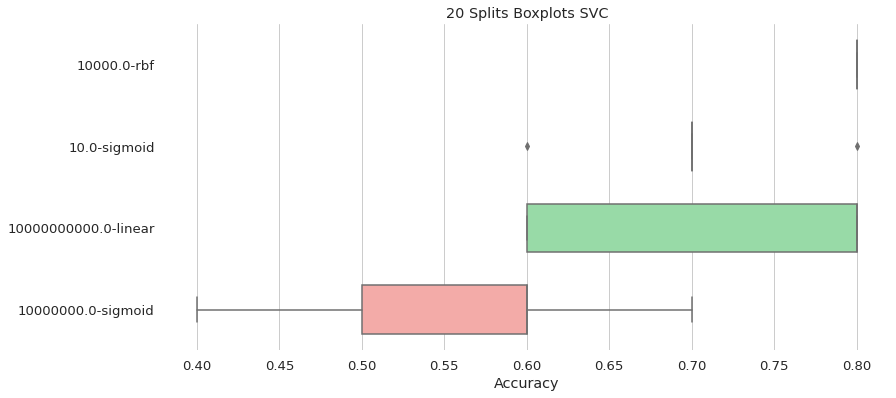

In [6]:
svm.boxplots(20)

In [7]:
results(X_data_curated,y_data_curated,'SVM', 5)

IndexError: index 1 is out of bounds for axis 1 with size 1

## KNN

In [ ]:
knn = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'KNN', n_splits = 5)
knn.fit(True,True)

[INFO] The best parameters are {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2}
[INFO] The best score is 0.8000
[INFO] The best parameters according to ci are {'algorithm': 'brute', 'n_neighbors': 9, 'p': 2}
[INFO] Train acc  is : 0.8163


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
knn.top_params(0.95, 5)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,algorithm,n_neighbors,p,mean,sem,ci,sort
31,"{'algorithm': 'brute', 'n_neighbors': 9, 'p': 2}",0.8,0.8,0.8,0.8,0.8,brute,9,2,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
30,"{'algorithm': 'brute', 'n_neighbors': 9, 'p': 1}",0.8,0.8,0.8,0.8,0.8,brute,9,1,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
22,"{'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...",0.8,0.8,0.8,0.8,0.8,kd_tree,9,1,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
21,"{'algorithm': 'kd_tree', 'n_neighbors': 7, 'p'...",0.8,0.8,0.8,0.8,0.8,kd_tree,7,2,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
15,"{'algorithm': 'ball_tree', 'n_neighbors': 9, '...",0.8,0.8,0.8,0.8,0.8,ball_tree,9,2,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


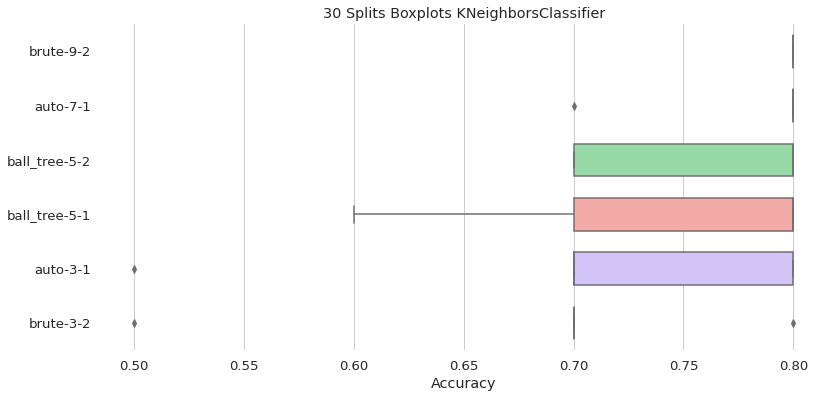

In [ ]:
knn.boxplots(30)

In [ ]:
results(X_data_curated,y_data_curated,'KNN', 5)

IndexError: index 1 is out of bounds for axis 1 with size 1

## Decision Tree

In [ ]:
dt = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'DT', n_splits = 5)
dt.fit(True,True)

[INFO] The best parameters are {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}
[INFO] The best score is 0.7600
[INFO] The best parameters according to ci are {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}
[INFO] Train acc  is : 1.0000


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
dt.top_params(0.95, 5)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,criterion,max_features,splitter,mean,sem,ci,sort
6,"{'criterion': 'entropy', 'max_features': 'auto...",0.7,0.8,0.7,0.8,0.8,entropy,auto,best,0.76,0.024495,"(0.6919912341697232, 0.8280087658302768)",0.345996
3,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.7,0.7,0.7,0.8,0.6,gini,sqrt,random,0.70,0.031623,"(0.6122010689270404, 0.7877989310729595)",0.306101
4,"{'criterion': 'gini', 'max_features': 'log2', ...",0.5,0.7,0.7,0.8,0.7,gini,log2,best,0.68,0.048990,"(0.5439824961038976, 0.8160175038961025)",0.271991
7,"{'criterion': 'entropy', 'max_features': 'auto...",0.7,0.5,0.7,0.8,0.7,entropy,auto,random,0.68,0.048990,"(0.5439824961038976, 0.8160175038961025)",0.271991
10,"{'criterion': 'entropy', 'max_features': 'log2...",0.6,0.5,0.7,0.6,0.6,entropy,log2,best,0.60,0.031623,"(0.5122010689270405, 0.6877989310729594)",0.256101


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


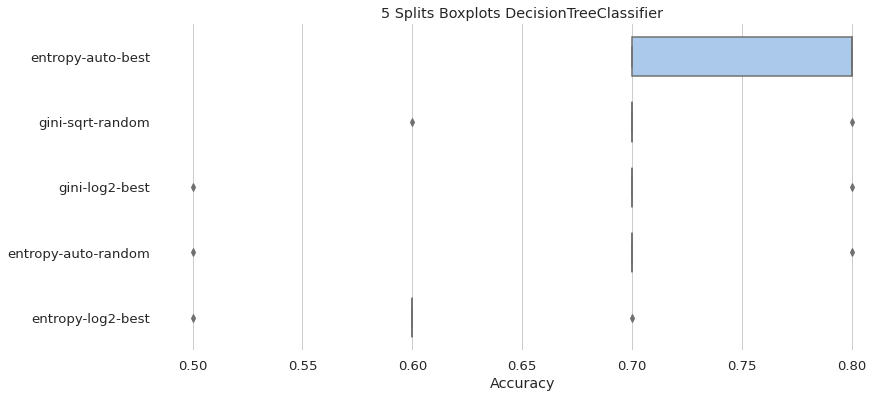

In [ ]:
dt.boxplots(5)

In [ ]:
results(X_data_curated,y_data_curated,'DT', 5)